In [1]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(1).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(10).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(100).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(11).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(12).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(13).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(14).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(15).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(16).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(17).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(18).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_

# IMPORTING REQUIRED PACKAGES

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Declaring X_train, Y_train, Creating Labels, Adding the images and Labels to X_train and Y_train

In [7]:
X_train=[]
Y_train=[]
image_size=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath=os.path.join(r'archive/Brain-Tumor-Classification-DataSet-master/Testing',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
   folderPath=os.path.join(r'archive/Brain-Tumor-Classification-DataSet-master/Training',i)
   for j in os.listdir(folderPath):
       img=cv2.imread(os.path.join(folderPath,j))
       img=cv2.resize(img,(image_size,image_size))
       X_train.append(img)
       Y_train.append(i)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

# Now X_train contains images and Y_train conatins Lables

In [8]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

# Splitting the data

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [10]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
74/74 [==============================] - 93s 1s/step - loss: 0.8603 - accuracy: 0.6275 - val_loss: 0.7722 - val_accuracy: 0.6684
Epoch 2/10
74/74 [==============================] - 96s 1s/step - loss: 0.7520 - accuracy: 0.6756 - val_loss: 0.7624 - val_accuracy: 0.6463
Epoch 3/10
74/74 [==============================] - 103s 1s/step - loss: 0.6721 - accuracy: 0.7075 - val_loss: 0.6742 - val_accuracy: 0.7262
Epoch 4/10
74/74 [==============================] - 97s 1s/step - loss: 0.6096 - accuracy: 0.7488 - val_loss: 0.6840 - val_accuracy: 0.7007
Epoch 5/10
74/74 [==============================] - 101s 1s/step - loss: 0.5249 - accuracy: 0.7782 - val_loss: 0.5659 - val_accuracy: 0.7466
Epoch 6/10
74/74 [==============================] - 97s 1s/step - loss: 0.4304 - accuracy: 0.8297 - val_loss: 0.5068 - val_accuracy: 0.7874
Epoch 7/10
74/74 [==============================] - 96s 1s/step - loss: 0.4066 - accuracy: 0.8318 - val_loss: 0.7544 - val_accuracy: 0.7279
Epoch 8/10
74/74 [

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

11/11 [==============================] - 4s 351ms/step


In [17]:
model.save('model.h5')

C:\Users\NITHIN GADDAM\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
model.save('my_model.keras')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Trainig Accuracy vs Validation Accuracy

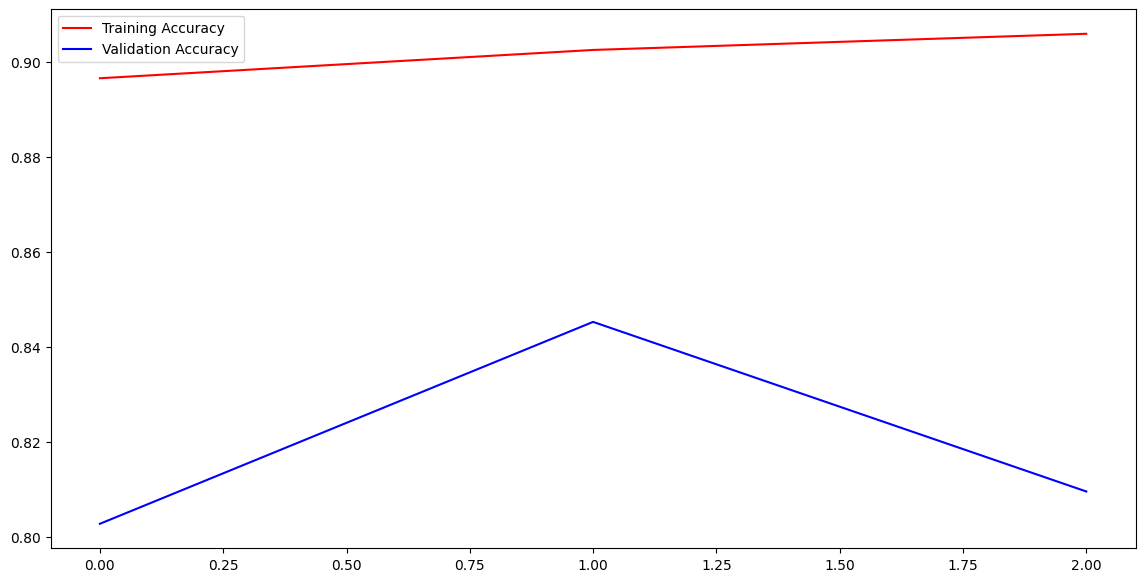

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


# Plotting Trainig Loss vs Validation Loss

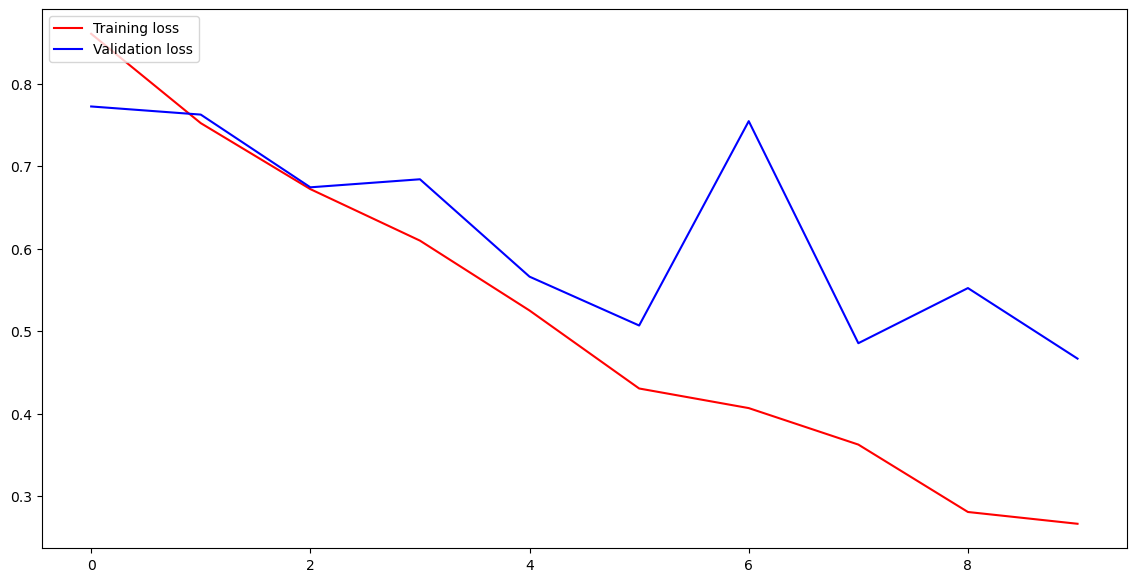

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [34]:
img = cv2.imread('archive/Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/image(1).jpg', 0)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150)

In [35]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 150, 150)

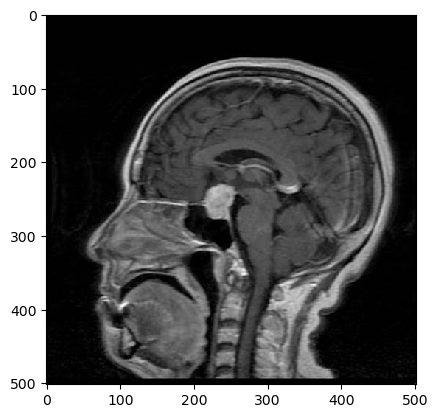

In [39]:
from tensorflow.keras.preprocessing import image
img = image.load_img('archive/Brain-Tumor-Classification-DataSet-master/Testing/pituitary_tumor/image(20).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

# Prediction Image

In [40]:
import numpy as np
import cv2
from keras.models import load_model

# Load the model
model = load_model('model.h5')

# Load and preprocess the image
img = cv2.imread('archive/Brain-Tumor-Classification-DataSet-master/Testing/pituitary_tumor/image(20).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict using the model
predictions = model.predict(img_array)
indices = predictions.argmax()

print(labels[indices])


1/1 [==============================] - 0s 228ms/step
pituitary_tumor


In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Optionally, you can print the test loss as well
print(f'Test Loss: {test_loss:.4f}')

11/11 [==============================] - 3s 275ms/step - loss: 0.4635 - accuracy: 0.8226
Test Accuracy: 82.26%
Test Loss: 0.4635
